# Problem set 1: Solved by Oscar Rosman and Sonja Kanerot

# Problem 3

The dynamics of a population practicing cannibalism.

### Part a)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

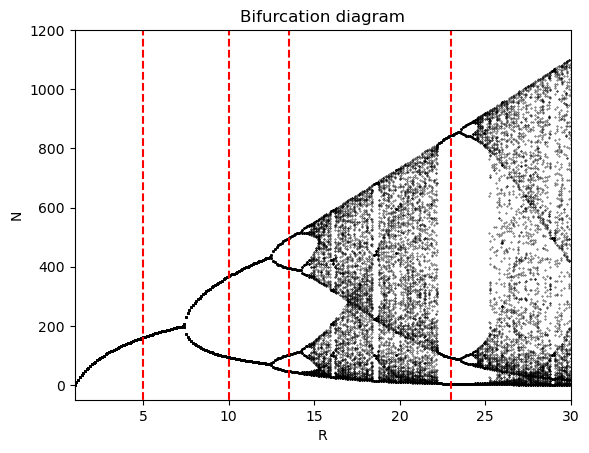

In [2]:
alpha = 0.01
n0 = 900
R = np.arange(1,30.1,0.1)
tLim = 300
tPlot = 100
system  = lambda N, R: R*N*np.exp(-alpha*N)

population = [[n0] for _ in range(len(R))]

for i in range(len(R)):
    for t in range(1,tLim):
        population[i].append(system(population[i][-1], R[i]))
    population[i] = population[i][(tLim-tPlot):]

for i,r in enumerate(R):
    rRange = r*np.ones(tPlot)
    plt.scatter(rRange, population[i], s=0.1, color='black')
plt.vlines([5, 10, 23, 13.5], -200, 1500, color='red', linestyles='dashed')
plt.xlabel('R')
plt.ylabel('N')
plt.xlim(1,30)
plt.ylim(-50, 1200)
plt.title('Bifurcation diagram')
plt.show()

A very clear bifurcation diagram that shows the solutions as a function of R with more chaotic and ordered regions. The dashed red lines show fixed point, 2, 3, and 4-point bifurcations which are used in part b below.

### Part b)

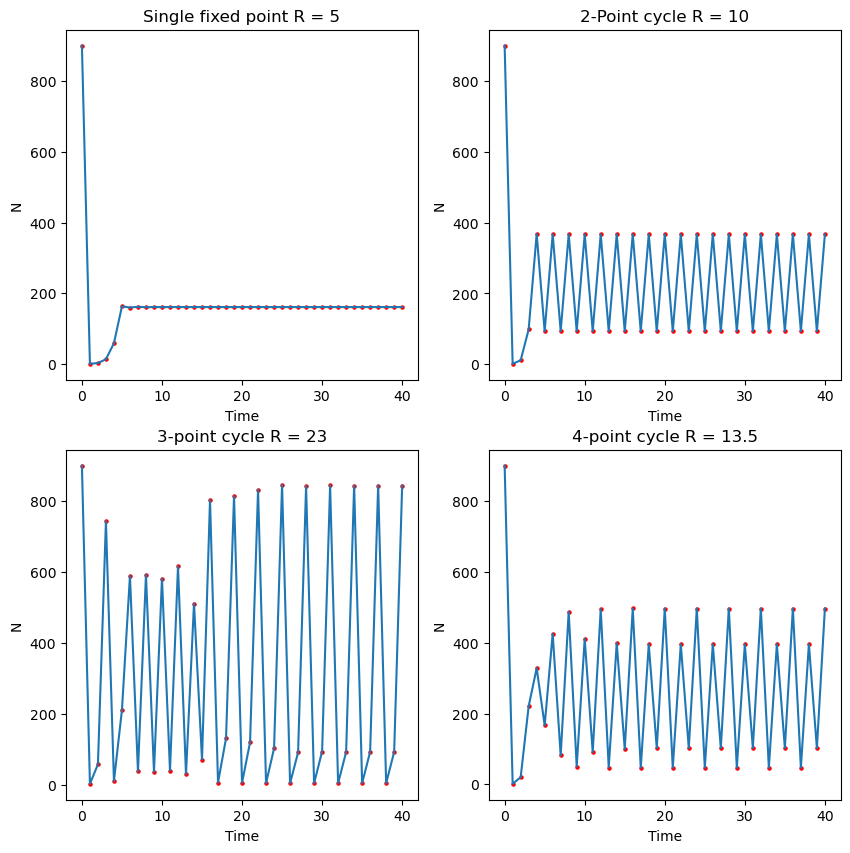

In [3]:
Rb = [5, 10, 23, 13.5]
labels = ['Single fixed point', '2-Point cycle', '3-point cycle', '4-point cycle']

tau = 40
populationB = [[n0] for _ in range(len(Rb))]

for i,r in enumerate(Rb):
    for _ in range(tau):
        populationB[i].append(system(populationB[i][-1], r))

fig, axs = plt.subplots(2, 2, figsize=(10,10))

for i,r in enumerate(Rb):
    time = np.arange(0,tau+1,1)
    axs[i//2, i%2].set_title(labels[i]+' R = '+str(r))
    axs[i//2, i%2].set_xlabel('Time')
    axs[i//2, i%2].set_ylabel('N')
    axs[i//2, i%2].plot(time, populationB[i], label='R = '+str(r))
    axs[i//2, i%2].scatter(time, populationB[i], s=5, color='red')

All plots stabalize rather quickly and after t > 20 it is clear to see that the plot oscillate or "jump between n points except for the single fixed point where it is a constant line. In the 2 point bifurcation it jumps between two very distinct states, in the 3 point bifurcation it has a minima and a maxima but also a point in the middle where it lands when going from the minima to the maxima. In the 4-point it has two distinct minima and two distinct maxima.

### Part c)

Where does the bifurcation diagram in a) bifurcate into 2-point and 4-point bifurcations?

2-point bifurcation first found at R = 7.4
4-point bifurcation first found at R = 12.5


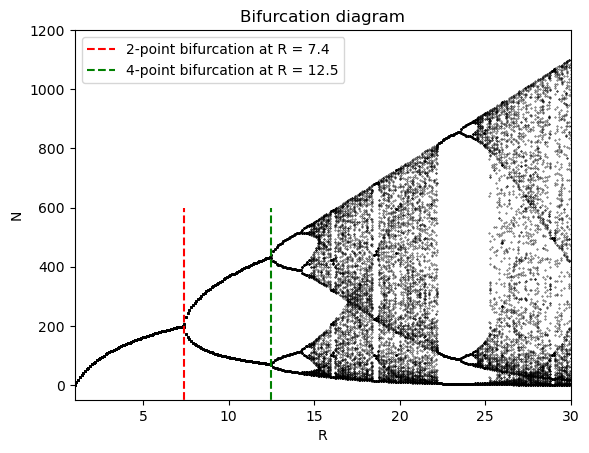

In [4]:
def FindKBifurcation(population, R, k):
    for i, p in enumerate(population):
        investigated = p[-20:]
        investigated = set([round(i) for i in investigated])
        
        if len(investigated) >= k:
            print(f'{k}-point bifurcation first found at R = {R[i]:.1f}')
            return R[i]

kPointBifurcations = [2, 4]
colors = ['red', 'green']
RC = []

for k in kPointBifurcations:
    RC.append(FindKBifurcation(population, R, k))

for i, rc in enumerate(RC):
    plt.vlines(rc, -200, 600, color=colors[i], linestyles='dashed', label=f'{kPointBifurcations[i]}-point bifurcation at R = {rc:.1f}')
    
for i,r in enumerate(R):
    rRange = r*np.ones(tPlot)
    plt.scatter(rRange, population[i], s=0.1, color='black')

plt.xlabel('R')
plt.ylabel('N')
plt.xlim(1,30)
plt.ylim(-50, 1200)
plt.title('Bifurcation diagram')
plt.legend(loc='upper left')





### Part d)

By refining the R-grid make a rough estimate of $R_\infty$ where the period doubling bifurcation has occured an infinte number of times

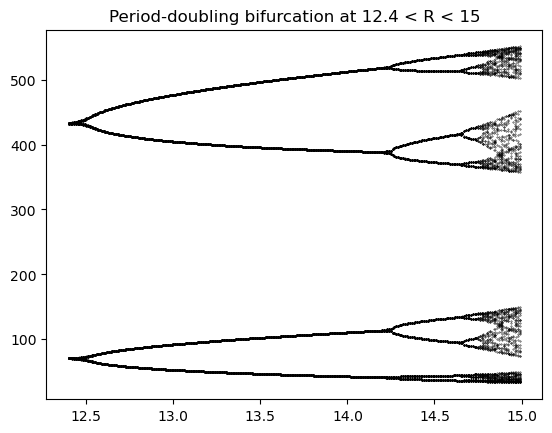

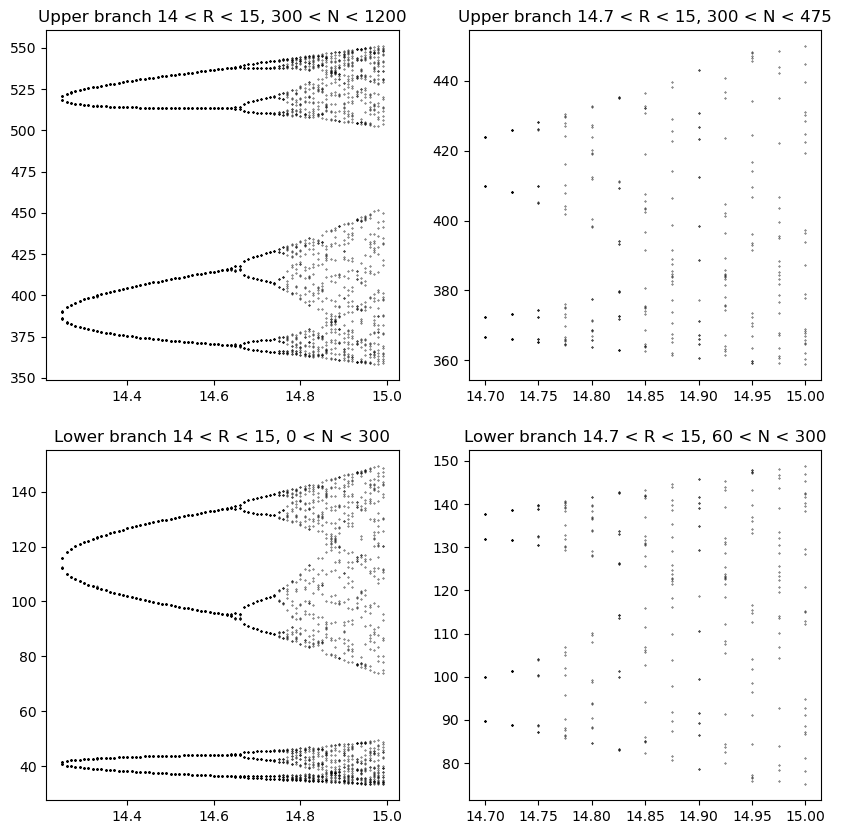

In [5]:
# Refine an area where period-doubling bifurcation occurs
Rd = np.arange(12.4, 15, 0.01)
populationD = [[n0] for _ in range(len(Rd))]

plt.title('Period-doubling bifurcation at 12.4 < R < 15')
for i in range(len(Rd)):
    for t in range(1,tLim):
        populationD[i].append(system(populationD[i][-1], Rd[i]))
    populationD[i] = populationD[i][(tLim-tPlot):]

for i,r in enumerate(Rd):
    rRange = r*np.ones(tPlot)
    plt.scatter(rRange, populationD[i], s=0.1, color='black')

# Refine it further and zoom in on branches
Rd = np.arange(14.25, 15, 0.01)
populationD = [[n0] for _ in range(len(Rd))]
lowerBranch = [[] for _ in range(len(Rd))]
upperBranch = [[] for _ in range(len(Rd))]

fig, axs = plt.subplots(2, 2, figsize=(10,10))

for i in range(len(Rd)):
    for t in range(1,tLim):
        populationD[i].append(system(populationD[i][-1], Rd[i]))
    populationD[i] = populationD[i][(tLim-tPlot):]
    for p in populationD[i]:
        if p < 300:
            lowerBranch[i].append(p)
        else:
            upperBranch[i].append(p)

for i,r in enumerate(Rd):
    rLRange = r*np.ones(len(lowerBranch[i]))
    rURange = r*np.ones(len(upperBranch[i]))
    axs[1,0].scatter(rLRange, lowerBranch[i], s=0.1, color='black')
    axs[1,0].set_title('Lower branch 14 < R < 15, 0 < N < 300')
    axs[0,0].scatter(rURange, upperBranch[i], s=0.1, color='black')
    axs[0,0].set_title('Upper branch 14 < R < 15, 300 < N < 1200')

# Select the more clear area where period-doubling bifurcation occurs and refine.
Rd = np.arange(14.7, 15, 0.025)
populationD = [[n0] for _ in range(len(Rd))]
lowerBranch = [[] for _ in range(len(Rd))]
upperBranch = [[] for _ in range(len(Rd))]

for i in range(len(Rd)):
    for t in range(1,tLim):
        populationD[i].append(system(populationD[i][-1], Rd[i]))
    populationD[i] = populationD[i][(tLim-tPlot):]
    for p in populationD[i]:
        if (p < 300) and (p > 60):
            lowerBranch[i].append(p)
        elif (p > 300) and (p < 475):
            upperBranch[i].append(p)

for i,r in enumerate(Rd):
    rLRange = r*np.ones(len(lowerBranch[i]))
    rURange = r*np.ones(len(upperBranch[i]))
    axs[1,1].scatter(rLRange, lowerBranch[i], s=0.1, color='black')
    axs[1,1].set_title('Lower branch 14.7 < R < 15, 60 < N < 300')
    axs[0,1].scatter(rURange, upperBranch[i], s=0.1, color='black')
    axs[0,1].set_title('Upper branch 14.7 < R < 15, 300 < N < 475')


In [6]:
# Identify where the period-doubling bifurcation occurs
kd = [2**i for i in range(1, 5)]
doubling = []
Rd = np.arange(5, 20, 0.05)
populationD = [[n0] for _ in range(len(Rd))]
for i in range(len(Rd)):
    for t in range(1,tLim):
        populationD[i].append(system(populationD[i][-1], Rd[i]))
    populationD[i] = populationD[i][(tLim-tPlot):]

for k in kd:
    doubling.append(FindKBifurcation(populationD, Rd, k))

# Add observed value from plot
doubling.append(14.75)
kd.append(32)

distance = [doubling[i+1] - doubling[i] for i in range(len(doubling)-1)]

print()
for i, d in enumerate(distance):
    print(f'Distance between period-doubling bifurcations {kd[i]}-{kd[i+1]} : {d:.2f}')

2-point bifurcation first found at R = 7.3
4-point bifurcation first found at R = 12.4
8-point bifurcation first found at R = 14.3
16-point bifurcation first found at R = 14.7

Distance between period-doubling bifurcations 2-4 : 5.10
Distance between period-doubling bifurcations 4-8 : 1.85
Distance between period-doubling bifurcations 8-16 : 0.40
Distance between period-doubling bifurcations 16-32 : 0.05


When looking at the large bifurcation diagram it seems like chaos but when refining the plot over the area just where it starts in the range 14.7-15.0 it is clear that it is the period doubling that intensifies. In particular in the most refined plots we see it evolve from 8-point cycles to 16, 32 and so on at almost every step in R. 

From the figures and the calculations it can be observed that the distance between each period-doubling bifurcation is decreasing and is nearing 0 at R>14. Because of the refinement and rounding earlier in the program it is only possible to make a very rough estimate that $R_\infty$ will occur around 14.8. Since the calculated values are very rough it is difficult to determine an exact scale between the bifurcations except that it is steadily decreasing.

### $R_\infty$ = 14.8